<a href="https://colab.research.google.com/github/Untick/IrisID_gr2/blob/Alexey-Tatarinov-folder/Alexey%20Tatarinov/Iris_Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Импорт библиотек и модулей**

In [ ]:
import gdown

import os

! pip install autokeras
import autokeras as ak

! pip install Augmentor
import Augmentor

import zipfile

import numpy as np

import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import (Dense, Conv2D, MaxPooling2D, Flatten, 
                                     Dropout, BatchNormalization, Rescaling,
                                     GlobalAveragePooling2D, RandomFlip, Input,
                                     RandomRotation, RandomZoom, RandomContrast)

from tensorflow.keras.applications import VGG19, ResNet50, Xception

# from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing.image import (ImageDataGenerator, 
                                                 DirectoryIterator)

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder

from PIL import Image, ImageEnhance

import matplotlib.pyplot as plt

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.7/527.7 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 106.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Подготовка датасета**

## **Задание гиперпараметров**

In [ ]:
TRAIN_PATH          = '/content/drive/MyDrive/iris_ds'
TRAIN_PATH_AUG      = '/content/drive/MyDrive/Iris'

VAL_SPLIT           = 0.2

IMG_WIDTH_1         = 160
IMG_HEIGHT_1        = 120
IMG_WIDTH_2         = 80
IMG_HEIGHT_2        = 60
IMG_CHANNELS        = 3

ROTATION_RANGE      = 10
WIDTH_SHIFT_RANGE   = 0.1
HEIGHT_SHIFT_RANGE  = 0.1
ZOOM_RANGE          = 0.1
BRIGHTNESS_RANGE    = (0.5, 1.3)
HORIZONTAL_FLIP     = False

EPOCHS              = 20
BATCH_SIZE          = 24
OPTIMIZER_LEGACY    = tf.keras.optimizers.legacy.Adam(0.0001)
OPTIMIZER           = tf.keras.optimizers.Adam(0.0001)

## **Загрузка датасета**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Аугментация**

In [ ]:
for folder in os.listdir(TRAIN_PATH):
    if os.path.isdir(os.path.join(TRAIN_PATH, folder)):
        # Создаем генератор аугментации для каждой папки
        p = Augmentor.Pipeline(os.path.join(TRAIN_PATH, folder), output_directory=os.path.join(f'/content/drive/MyDrive/Iris/{folder}'))
        # Добавляем операции аугментации
        # Вращение изображения
        p.rotate(probability=0.2, max_left_rotation=10, max_right_rotation=10)
        # увеличение
        #p.zoom(probability=0.2, min_factor=1.1, max_factor=1.2)
        # Обрезание изображения
        p.crop_random(probability=0.1, percentage_area=0.95)
        # Изменение яркости
        p.random_brightness(probability=0.5, min_factor=0.7, max_factor=1.3)
        # Изменение контрасности
        p.random_contrast(probability=0.5, min_factor=0.7, max_factor=1.3)
        # Применяем аугментацию
        p.sample(50)
print('Аугментация завершена')

Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_12.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA70E710>: 100%|██████████| 50/50 [00:07<00:00,  6.70 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_15.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAB331030>: 100%|██████████| 50/50 [00:07<00:00,  6.86 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_23.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA70E680>: 100%|██████████| 50/50 [00:08<00:00,  5.99 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_13.

Processing <PIL.Image.Image image mode=RGB size=729x547 at 0x7FBAAA8FF2B0>: 100%|██████████| 50/50 [00:07<00:00,  6.75 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_40.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA8FFCD0>: 100%|██████████| 50/50 [00:08<00:00,  6.05 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_49.

Processing <PIL.Image.Image image mode=RGB size=729x547 at 0x7FBAAA8FEBC0>: 100%|██████████| 50/50 [00:07<00:00,  7.09 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_25.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA70DF60>: 100%|██████████| 50/50 [00:08<00:00,  6.15 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_22.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA8FF700>: 100%|██████████| 50/50 [00:06<00:00,  7.17 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_47.

Processing <PIL.Image.Image image mode=RGB size=729x547 at 0x7FBB280B0FD0>: 100%|██████████| 50/50 [00:09<00:00,  5.47 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_14.

Processing <PIL.Image.Image image mode=RGB size=729x547 at 0x7FBAAB2E7DF0>: 100%|██████████| 50/50 [00:06<00:00,  7.85 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_48.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA8FFB50>: 100%|██████████| 50/50 [00:08<00:00,  5.81 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_64.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA8D8DC0>: 100%|██████████| 50/50 [00:07<00:00,  6.74 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_8.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA8D8820>: 100%|██████████| 50/50 [00:08<00:00,  5.59 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_6.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x576 at 0x7FBAAA855C60>: 100%|██████████| 50/50 [00:06<00:00,  7.17 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_7.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA70E170>: 100%|██████████| 50/50 [00:09<00:00,  5.45 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_9.

Processing <PIL.Image.Image image mode=RGB size=729x547 at 0x7FBAAA8D8580>: 100%|██████████| 50/50 [00:06<00:00,  7.39 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_46.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA70EE60>: 100%|██████████| 50/50 [00:08<00:00,  5.62 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_1.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x576 at 0x7FBAAB2E6A70>: 100%|██████████| 50/50 [00:07<00:00,  6.70 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_24.

Processing <PIL.Image.Image image mode=RGB size=729x547 at 0x7FBAAA741510>: 100%|██████████| 50/50 [00:08<00:00,  5.98 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_41.

Processing <PIL.Image.Image image mode=RGB size=729x547 at 0x7FBAAA8D8580>: 100%|██████████| 50/50 [00:06<00:00,  7.14 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_30.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x576 at 0x7FBAAB24F550>: 100%|██████████| 50/50 [00:07<00:00,  6.26 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_37.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA8DA650>: 100%|██████████| 50/50 [00:07<00:00,  6.59 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_63.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAB333550>: 100%|██████████| 50/50 [00:07<00:00,  6.46 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_55.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA8D86A0>: 100%|██████████| 50/50 [00:07<00:00,  6.55 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_39.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAB333550>: 100%|██████████| 50/50 [00:06<00:00,  7.95 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_62.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA856DD0>: 100%|██████████| 50/50 [00:08<00:00,  6.13 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_31.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA7401F0>: 100%|██████████| 50/50 [00:07<00:00,  6.96 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_54.

Processing <PIL.Image.Image image mode=RGB size=729x547 at 0x7FBAAA718040>: 100%|██████████| 50/50 [00:07<00:00,  6.56 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_53.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAB2AB0A0>: 100%|██████████| 50/50 [00:07<00:00,  6.51 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_52.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAB2C2710>: 100%|██████████| 50/50 [00:08<00:00,  6.14 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_26.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x576 at 0x7FBAAA70C880>: 100%|██████████| 50/50 [00:07<00:00,  6.49 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_28.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA719180>: 100%|██████████| 50/50 [00:09<00:00,  5.42 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_17.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA75D150>: 100%|██████████| 50/50 [00:06<00:00,  7.87 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_10.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA70DD80>: 100%|██████████| 50/50 [00:08<00:00,  6.13 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_38.

Processing <PIL.Image.Image image mode=RGB size=729x547 at 0x7FBAAA75C970>: 100%|██████████| 50/50 [00:06<00:00,  7.32 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_43.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA74D900>: 100%|██████████| 50/50 [00:08<00:00,  5.92 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_19.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA856DD0>: 100%|██████████| 50/50 [00:06<00:00,  7.61 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_36.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA8545B0>: 100%|██████████| 50/50 [00:08<00:00,  5.97 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_44.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA75FE20>: 100%|██████████| 50/50 [00:07<00:00,  7.00 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_21.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA7779A0>: 100%|██████████| 50/50 [00:08<00:00,  5.59 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_42.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA855900>: 100%|██████████| 50/50 [00:06<00:00,  7.29 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_4.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA71BE50>: 100%|██████████| 50/50 [00:09<00:00,  5.53 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_45.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA70C700>: 100%|██████████| 50/50 [00:06<00:00,  7.73 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_20.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA856290>: 100%|██████████| 50/50 [00:08<00:00,  6.09 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_3.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAB2ABBB0>: 100%|██████████| 50/50 [00:06<00:00,  7.93 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_16.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA75D420>: 100%|██████████| 50/50 [00:09<00:00,  5.49 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_29.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA856830>: 100%|██████████| 50/50 [00:06<00:00,  7.39 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_11.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x576 at 0x7FBAAA787C70>: 100%|██████████| 50/50 [00:08<00:00,  6.06 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_27.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA7847C0>: 100%|██████████| 50/50 [00:06<00:00,  7.41 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_18.

Processing <PIL.Image.Image image mode=RGB size=729x547 at 0x7FBAAA75C430>: 100%|██████████| 50/50 [00:09<00:00,  5.51 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_35.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA719480>: 100%|██████████| 50/50 [00:06<00:00,  7.70 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_58.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA774F70>: 100%|██████████| 50/50 [00:09<00:00,  5.26 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_60.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA75FAF0>: 100%|██████████| 50/50 [00:07<00:00,  7.05 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_51.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA70C700>: 100%|██████████| 50/50 [00:08<00:00,  6.11 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_33.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA74F5B0>: 100%|██████████| 50/50 [00:07<00:00,  6.50 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_34.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAB2ABF10>: 100%|██████████| 50/50 [00:07<00:00,  6.64 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_2.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA78D690>: 100%|██████████| 50/50 [00:07<00:00,  6.86 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_5.

Processing <PIL.Image.Image image mode=RGB size=729x547 at 0x7FBAAA785210>: 100%|██████████| 50/50 [00:08<00:00,  6.17 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_56.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA7AE0B0>: 100%|██████████| 50/50 [00:07<00:00,  6.56 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_32.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA78DF30>: 100%|██████████| 50/50 [00:06<00:00,  7.62 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_57.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x576 at 0x7FBAAA7AC7C0>: 100%|██████████| 50/50 [00:07<00:00,  6.33 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_59.

Processing <PIL.Image.Image image mode=RGB size=729x547 at 0x7FBAAA7ACAF0>: 100%|██████████| 50/50 [00:07<00:00,  6.37 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_61.

Processing <PIL.Image.Image image mode=RGB size=768x576 at 0x7FBAAA7AE170>: 100%|██████████| 50/50 [00:08<00:00,  5.65 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/drive/MyDrive/Iris/client_50.

Processing <PIL.Image.Image image mode=RGB size=729x547 at 0x7FBAAA74C8B0>: 100%|██████████| 50/50 [00:07<00:00,  7.12 Samples/s]

Аугментация завершена


## **Создание базы**

In [ ]:
CLASS_LIST = sorted(os.listdir(TRAIN_PATH_AUG))
CLASS_COUNT = len(CLASS_LIST)

print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 64, метки классов: ['client_1', 'client_10', 'client_11', 'client_12', 'client_13', 'client_14', 'client_15', 'client_16', 'client_17', 'client_18', 'client_19', 'client_2', 'client_20', 'client_21', 'client_22', 'client_23', 'client_24', 'client_25', 'client_26', 'client_27', 'client_28', 'client_29', 'client_3', 'client_30', 'client_31', 'client_32', 'client_33', 'client_34', 'client_35', 'client_36', 'client_37', 'client_38', 'client_39', 'client_4', 'client_40', 'client_41', 'client_42', 'client_43', 'client_44', 'client_45', 'client_46', 'client_47', 'client_48', 'client_49', 'client_5', 'client_50', 'client_51', 'client_52', 'client_53', 'client_54', 'client_55', 'client_56', 'client_57', 'client_58', 'client_59', 'client_6', 'client_60', 'client_61', 'client_62', 'client_63', 'client_64', 'client_7', 'client_8', 'client_9']


In [ ]:
data_files = []
data_labels = []

for class_label in range(CLASS_COUNT):    # Для всех классов по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен
    class_path = f'{TRAIN_PATH_AUG}/{class_name}'  # Формирование полного пути к папке с изображениями класса
    class_files = os.listdir(class_path)  # Получение списка имен файлов с изображениями текущего класса
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]
    data_labels += [class_label] * len(class_files)
    print(f'Размер класса {class_name} составляет {len(class_files)} снимков')

print('Общий размер базы для обучения:', len(data_labels))

Размер класса client_1 составляет 50 снимков
Размер класса client_10 составляет 50 снимков
Размер класса client_11 составляет 50 снимков
Размер класса client_12 составляет 50 снимков
Размер класса client_13 составляет 50 снимков
Размер класса client_14 составляет 50 снимков
Размер класса client_15 составляет 50 снимков
Размер класса client_16 составляет 50 снимков
Размер класса client_17 составляет 50 снимков
Размер класса client_18 составляет 50 снимков
Размер класса client_19 составляет 50 снимков
Размер класса client_2 составляет 50 снимков
Размер класса client_20 составляет 50 снимков
Размер класса client_21 составляет 50 снимков
Размер класса client_22 составляет 50 снимков
Размер класса client_23 составляет 50 снимков
Размер класса client_24 составляет 50 снимков
Размер класса client_25 составляет 50 снимков
Размер класса client_26 составляет 50 снимков
Размер класса client_27 составляет 50 снимков
Размер класса client_28 составляет 50 снимков
Размер класса client_29 составляет 5

In [ ]:
# data_images_1 = []

# for file_name in data_files:
#     img = Image.open(file_name).resize((IMG_WIDTH_1, IMG_HEIGHT_1)) 
#     img_np = np.array(img)
#     data_images_1.append(img_np)

# x_data_big = np.array(data_images_1)
# y_data = np.array(data_labels)

# print(f'В массив собрано {len(data_images_1)} фотографий следующей формы: {img_np.shape}')
# print(f'Общий массив данных изображений следующей формы: {x_data_big.shape}')
# print(f'Общий массив меток классов следующей формы: {y_data.shape}')

data_images = []

for file_name in data_files:
    img = Image.open(file_name).resize((IMG_WIDTH_2, IMG_HEIGHT_2)) 
    img_np = np.array(img)
    data_images.append(img_np)

x_data_small = np.array(data_images)
y_data = np.array(data_labels)

print(f'В массив собрано {len(data_images)} фотографий следующей формы: {img_np.shape}')
print(f'Общий массив данных изображений следующей формы: {x_data_small.shape}')
print(f'Общий массив меток классов следующей формы: {y_data.shape}')

В массив собрано 3200 фотографий следующей формы: (60, 80, 3)
Общий массив данных изображений следующей формы: (3200, 60, 80, 3)
Общий массив меток классов следующей формы: (3200,)


## **Деление на выборки**

In [ ]:
# Разделение выборки на обучающую, проверочную и тестовую
# x_ds_big, x_val_big, y_ds_big, y_val_big = train_test_split(x_data_big, y_data, test_size=0.2, random_state=42)
# x_train_big, x_test_big, y_train_big, y_test_big = train_test_split(x_ds_big, y_ds_big, test_size=0.1, random_state=42)

x_ds_small, x_val_small, y_ds_small, y_val_small = train_test_split(x_data_small, y_data, test_size=0.2, random_state=42)
x_train_small, x_test_small, y_train_small, y_test_small = train_test_split(x_ds_small, y_ds_small, test_size=0.1, random_state=42)

In [ ]:
y_train_small = to_categorical(y_train_small)
# y_train_big = to_categorical(y_train_big)

y_val_small = to_categorical(y_val_small)
# y_val_big = to_categorical(y_val_big)

y_test_small = to_categorical(y_test_small)
# y_test_big = to_categorical(y_test_big)

In [ ]:
# print('Размерности датасетов с изображениями 160 на 120')
# print('Тренировочный датасет:')
# print(x_train_big.shape)
# print(y_train_big.shape)
# print('Проверочный датасет:')
# print(x_val_big.shape)
# print(y_val_big.shape)
# print('Тестовый датасет:')
# print(x_test_big.shape)
# print(y_test_big.shape)

print('\nРазмерности датасетов с изображениями 80 на 60')
print('Тренировочный датасет:')
print(x_train_small.shape)
print(y_train_small.shape)
print('Проверочный датасет:')
print(x_val_small.shape)
print(y_val_small.shape)
print('Тестовый датасет:')
print(x_test_small.shape)
print(y_test_small.shape)


Размерности датасетов с изображениями 80 на 60
Тренировочный датасет:
(2304, 60, 80, 3)
(2304, 64)
Проверочный датасет:
(640, 60, 80, 3)
(640, 64)
Тестовый датасет:
(256, 60, 80, 3)
(256, 64)


# **Оптимизация обучения модели**

In [ ]:
# AUTOTUNE = tf.data.AUTOTUNE
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
checkpoint = ModelCheckpoint(filepath="my_model.hdf5", monitor="val_loss", verbose=0, save_best_only=True)

# **Работа с моделью**

## **Архитектура модели**

In [ ]:
image_shape_small = x_train_small.shape[1:]
# image_shape_big = x_train_big.shape[1:]  

model_1 = Sequential()
model_1.add(Conv2D(64, (3, 3), activation='relu', input_shape=image_shape_small))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(128, (3, 3), activation='relu'))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(128, (3, 3), activation='relu'))
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(CLASS_COUNT, activation='softmax'))

## **Обучение модели**

In [ ]:
model_1.compile(
              optimizer=OPTIMIZER_LEGACY,
              loss='categorical_crossentropy',
              metrics='accuracy')
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 58, 78, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 39, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 27, 37, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 18, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 16, 128)       147584    
                                                                 
 flatten_1 (Flatten)         (None, 22528)            

In [ ]:
history_small = model_1.fit(
                          x_train_small,
                          y_train_small,
                          epochs=50,
                          validation_data=(x_val_small, y_val_small),
                          callbacks=checkpoint,
                          )

Epoch 1/50
72/72 [==============================] - 2s 15ms/step - loss: 6.4669 - accuracy: 0.0243 - val_loss: 4.0960 - val_accuracy: 0.0375
Epoch 2/50
72/72 [==============================] - 1s 12ms/step - loss: 3.9221 - accuracy: 0.0373 - val_loss: 3.8217 - val_accuracy: 0.0375
Epoch 3/50
72/72 [==============================] - 1s 12ms/step - loss: 3.5091 - accuracy: 0.1150 - val_loss: 3.2075 - val_accuracy: 0.2016
Epoch 4/50
72/72 [==============================] - 1s 12ms/step - loss: 2.8444 - accuracy: 0.2643 - val_loss: 2.6006 - val_accuracy: 0.3453
Epoch 5/50
72/72 [==============================] - 1s 12ms/step - loss: 2.0355 - accuracy: 0.4883 - val_loss: 1.8255 - val_accuracy: 0.5281
Epoch 6/50
72/72 [==============================] - 1s 12ms/step - loss: 1.3850 - accuracy: 0.6758 - val_loss: 1.3790 - val_accuracy: 0.6891
Epoch 7/50
72/72 [==============================] - 1s 12ms/step - loss: 0.8307 - accuracy: 0.8038 - val_loss: 0.8771 - val_accuracy: 0.7953
Epoch 8/50
72

# **Проверка модели**

## **Визуализация результатов работы модели**

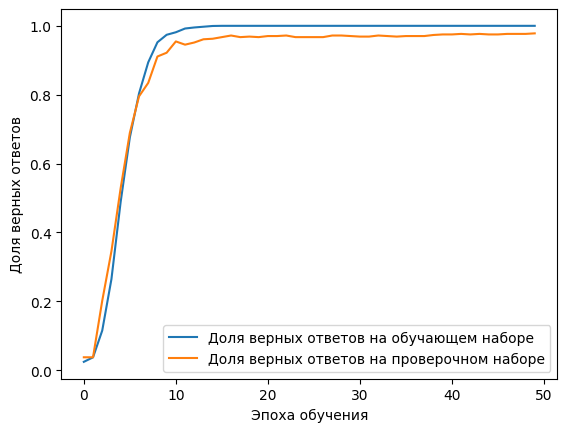

In [ ]:
# Визуализация точности на обучающей выборке
plt.plot(history_small.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history_small.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()

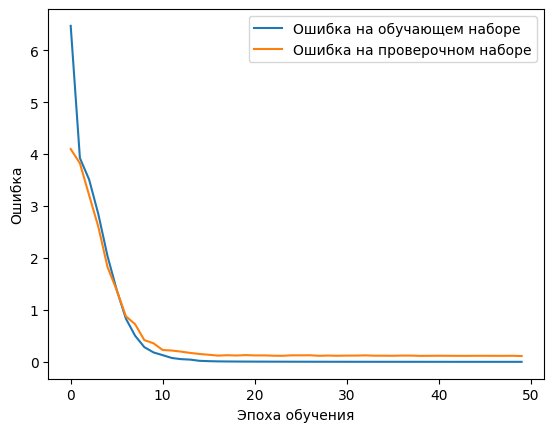

In [ ]:
# Визуализация точности на обучающей выборке
plt.plot(history_small.history['loss'], 
         label='Ошибка на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history_small.history['val_loss'], 
         label='Ошибка на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')

plt.legend()

plt.show()

## **Проверка evaluate**

In [ ]:
scores_small = model_1.evaluate(x_test_small, 
                                y_test_small, 
                                verbose=1
                                )

print('Процент верных ответов на тестовых данных размером 80 на 60:', round(scores_small[1],4) * 100, '%')

8/8 [==============================] - 0s 5ms/step - loss: 0.0738 - accuracy: 0.9922
Процент верных ответов на тестовых данных размером 80 на 60: 99.22 %


## **Проверка predict**

In [ ]:
x = x_test_small[10]
print(x.shape)

x = np.expand_dims(x, axis=0)
print(x.shape)

prediction = model_1.predict(x) 
print(prediction)

pred = np.argmax(prediction)
print(f'Распознан пациент: {pred}')
print(f'Настоящий пациент: {np.argmax(y_test_small[10])}')

(60, 80, 3)
(1, 60, 80, 3)
1/1 [==============================] - 0s 34ms/step
[[5.76003381e-17 2.92681621e-16 1.13430418e-10 6.87499710e-11
  2.43711263e-15 9.99971628e-01 3.31126442e-20 1.07975915e-16
  5.07327158e-18 1.79086874e-06 4.66229038e-23 1.56584520e-11
  1.03756059e-09 3.69329106e-13 8.57895549e-17 3.50421806e-19
  1.77504739e-13 2.05487537e-11 1.30715613e-17 1.97258948e-21
  7.19597685e-27 4.75880135e-15 9.36827175e-17 5.90900077e-14
  4.74624300e-13 4.28448408e-15 1.14219656e-05 2.94226720e-14
  1.15876466e-11 9.01749487e-13 3.44109906e-18 1.89776936e-14
  1.65918948e-18 3.12250607e-15 3.95964077e-13 8.79384456e-14
  6.01646391e-13 1.76885917e-13 1.51644997e-16 1.45206018e-13
  8.88972619e-16 4.20334073e-10 1.33661473e-08 2.00215097e-18
  2.48133625e-21 6.99348977e-21 2.52484513e-12 6.75276424e-16
  4.45904530e-18 1.56041217e-12 2.01196235e-22 9.26234145e-10
  3.62364067e-12 1.51250670e-05 1.06914371e-16 4.22199473e-19
  1.45914623e-08 5.78246480e-18 4.27739355e-24 3.4958